<a href="https://colab.research.google.com/github/Polydany0/Digital-Image-Processing/blob/main/DETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Явная установка совместимых версий библиотек
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -U transformers pillow requests matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118


In [8]:
# Импорт необходимых библиотек
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import requests
import matplotlib.pyplot as plt
import torch
import random
import numpy as np
from io import BytesIO
import os

In [3]:
# Список API для случайных изображений
IMAGE_API_SOURCES = [
    "https://picsum.photos/800/600?random=1",
    "https://picsum.photos/800/600?random=2",
    "https://picsum.photos/800/600?random=3",
    "https://picsum.photos/800/600?random=4"
]

In [9]:
def get_random_image():
    """Загружает случайное изображение с различных API"""
    for _ in range(3):  # Попытки
        try:
            source = random.choice(IMAGE_API_SOURCES)
            response = requests.get(source, timeout=10)
            image = Image.open(BytesIO(response.content))

            # Проверка формата изображения
            if image.format in ['JPEG', 'PNG', 'WEBP']:
                return image.convert('RGB')
        except Exception as e:
            print(f"⚠️ Ошибка при загрузке: {e}")

    # Fallback изображение
    print("🔄 Используем стандартное изображение...")
    return Image.open(requests.get(
        "http://images.cocodataset.org/val2017/000000039769.jpg",
        stream=True
    ).raw).convert('RGB')

In [11]:
# Загрузка модели и процессора DETR
print("\n🔄 Загрузка модели DETR-resnet-50...")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
print("✅ Модель успешно загружена!")

# Получение информации о модели
print(f"\nℹ️ Модель: {model.config.model_type}")
print(f"ℹ️ Количество классов: {model.config.num_labels}")
print(f"ℹ️ Размер скрытого слоя: {model.config.d_model}")
print(f"ℹ️ Количество энкодеров: {model.config.encoder_layers}")
print(f"ℹ️ Количество декодеров: {model.config.decoder_layers}")


🔄 Загрузка модели DETR-resnet-50...


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


✅ Модель успешно загружена!

ℹ️ Модель: detr
ℹ️ Количество классов: 91
ℹ️ Размер скрытого слоя: 256
ℹ️ Количество энкодеров: 6
ℹ️ Количество декодеров: 6


In [12]:
# Создание сетки изображений
num_images = 2
plt.figure(figsize=(15, 10))
plt.suptitle('Обнаружение объектов с помощью DETR', fontsize=20, y=0.95)

Text(0.5, 0.95, 'Обнаружение объектов с помощью DETR')

<Figure size 1500x1000 with 0 Axes>

⚠️ Используем стандартный шрифт

🚀 Обработка изображения 1/2...
⚠️ Ошибка при загрузке: cannot identify image file <_io.BytesIO object at 0x7993a81cd5d0>
⚠️ Ошибка при загрузке: cannot identify image file <_io.BytesIO object at 0x7993a0118180>
⚠️ Ошибка при загрузке: cannot identify image file <_io.BytesIO object at 0x7993a81cd5d0>
🔄 Используем стандартное изображение...
  🔍 Обнаружено: remote: 0.998 в позиции [40.16, 70.81, 175.55, 117.98]
  🔍 Обнаружено: remote: 0.996 в позиции [333.24, 72.55, 368.33, 187.66]
  🔍 Обнаружено: couch: 0.995 в позиции [-0.02, 1.15, 639.73, 473.76]
  🔍 Обнаружено: cat: 0.999 в позиции [13.24, 52.05, 314.02, 470.93]
  🔍 Обнаружено: cat: 0.999 в позиции [345.4, 23.85, 640.37, 368.72]
  ✅ Всего обнаружено объектов: 5

🚀 Обработка изображения 2/2...
⚠️ Ошибка при загрузке: cannot identify image file <_io.BytesIO object at 0x7993a015a570>
⚠️ Ошибка при загрузке: cannot identify image file <_io.BytesIO object at 0x7993a0107740>
⚠️ Ошибка при загрузке: cannot id

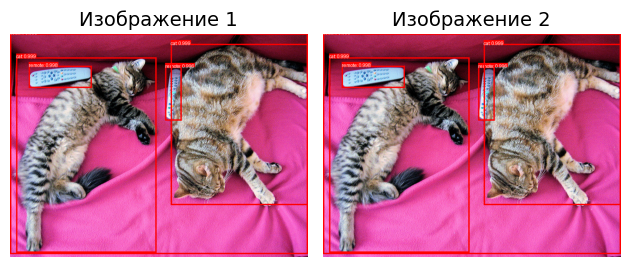


✅ Обнаружение объектов завершено!


In [13]:
# Шрифт для текста
try:
    font = ImageFont.truetype("arial.ttf", 20)
except:
    font = ImageFont.load_default()
    print("⚠️ Используем стандартный шрифт")

for i in range(num_images):
    # Загрузка и обработка изображения
    print(f"\n🚀 Обработка изображения {i+1}/{num_images}...")
    image = get_random_image()

    # Предобработка и обнаружение объектов
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)

    # Постобработка результатов
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(
        outputs, target_sizes=target_sizes, threshold=0.7
    )[0]

    # Визуализация результатов
    draw = ImageDraw.Draw(image)

    detection_count = 0
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        if score > 0.7:  # Порог уверенности
            box = [round(i, 2) for i in box.tolist()]
            label_name = model.config.id2label[label.item()]
            confidence = round(score.item(), 3)

            # Рисуем bounding box
            draw.rectangle(box, outline="red", width=3)

            # Добавляем текст с классом и уверенностью
            text = f"{label_name}: {confidence}"

            # Современный метод получения размера текста
            bbox = draw.textbbox((0, 0), text, font=font)
            text_width = bbox[2] - bbox[0]
            text_height = bbox[3] - bbox[1]

            # Рисуем фон для текста
            draw.rectangle(
                [box[0], box[1] - text_height, box[0] + text_width, box[1]],
                fill="red"
            )

            # Добавляем текст
            draw.text((box[0], box[1] - text_height), text, fill="white", font=font)

            print(f"  🔍 Обнаружено: {text} в позиции {box}")
            detection_count += 1

    print(f"  ✅ Всего обнаружено объектов: {detection_count}")

    # Отображение в сетке
    ax = plt.subplot(1, num_images, i+1)
    plt.imshow(image)
    plt.title(f"Изображение {i+1}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

print("\n" + "="*50)
print("✅ Обнаружение объектов завершено!")
print("="*50)

In [14]:
# Дополнительная информация о DETR
print("\n🌟 Основные характеристики DETR:")
print("- End-to-end обнаружение объектов без anchor boxes")
print("- Использование трансформеров для связи между объектами")
print("- Прямое предсказание bounding boxes и классов")
print("- Бипартитное сопоставление для обучения")
print(f"- Размер скрытого слоя: {model.config.d_model}")
print(f"- Количество энкодеров: {model.config.encoder_layers}")
print(f"- Количество декодеров: {model.config.decoder_layers}")
print(f"- Количество запросов: {model.config.num_queries}")


🌟 Основные характеристики DETR:
- End-to-end обнаружение объектов без anchor boxes
- Использование трансформеров для связи между объектами
- Прямое предсказание bounding boxes и классов
- Бипартитное сопоставление для обучения
- Размер скрытого слоя: 256
- Количество энкодеров: 6
- Количество декодеров: 6
- Количество запросов: 100
